##  Linear Regression & Loss Function

In [0]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

## 문제 1 Grid Search를 활용한 Linear Regression

linear regression 과 **Grid Search**  을 이용해 아래 데이터를 linear regression 해주세요. 


###  Grid Search


1. 탐색할 가중치 조합을 구성합니다. 이 때 `np.meshgrid` 혹은 `np.mgrid`로 구성합니다. 

2. 위의 가중치 조합에서 가중치를 뽑아, 예측값을 산출합니다.

3. 실제 값과 예측값의 차이를 MSE로 계산합니다.

3. 모든 가중치 조합 중 가장 작은 MSE를 보이는 Loss값 조합을 찾습니다.


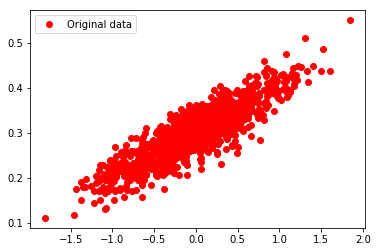

In [3]:
# 아래 코드를 실행해 주세요 
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

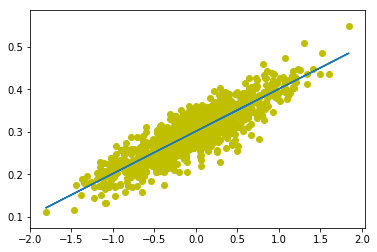

In [21]:
# 정답을 서술해주세요!
w = np.linspace(0,1,1000)
b = np.linspace(0,1,1000)
points = np.stack(np.meshgrid(w,b), axis=-1)
points = points.reshape(-1,2)
points

def calculate_MSE(w,b):
  yhat = w*xs + b
  return ((ys-yhat)**2).mean()


loss = []
for w, b in points:
  loss.append(calculate_MSE(w,b))
loss = np.array(loss)

import pandas as pd
points_with_loss = np.concatenate([points, loss.reshape(-1,1)], axis=1)
loss_df = pd.DataFrame(points_with_loss, columns=['w','b','loss'])

w_, b_, _=loss_df.sort_values('loss').iloc[0]



plt.scatter(xs, ys, c='y', marker='o')
plt.plot(xs, w_*xs+b_)
plt.show()

#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/zEiW7zM.png)

## 문제 2

문제 1과 동일합니다. 다만 Loss function은 MAE(mean absolute Error)을 사용합니다 <br>
아래와 같은 그림이 나올수 있도록 Linear Regression 결과를 시각화 해주세요 

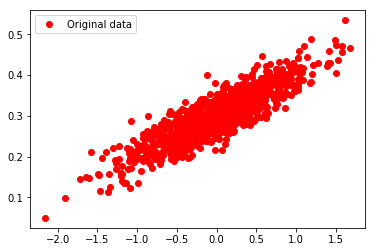

In [22]:
# 아래 코드를 실행해 주세요 
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

xs = np.asarray([v[0] for v in vectors_set])
ys = np.asarray([v[1] for v in vectors_set])

plt.plot(xs, ys, 'ro', label='Original data')
plt.legend()
plt.show()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

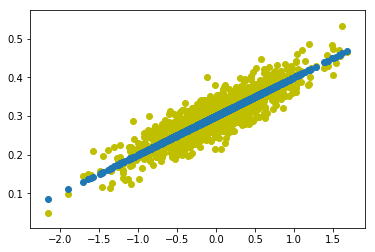

In [24]:
# 정답을 서술해 주세요!
w = np.linspace(0,1,1000)
b = np.linspace(0,1,1000)
points = np.stack(np.meshgrid(w,b), axis=-1)
points = points.reshape(-1,2)
points

def calculate_MSE(w,b):
  yhat = w*xs + b
  return (np.absolute(ys-yhat)).mean()


loss = []
for w, b in points:
  loss.append(calculate_MSE(w,b))
loss = np.array(loss)

import pandas as pd
points_with_loss = np.concatenate([points, loss.reshape(-1,1)], axis=1)
loss_df = pd.DataFrame(points_with_loss, columns=['w','b','loss'])

w_, b_, _=loss_df.sort_values('loss').iloc[0]



plt.scatter(xs, ys, c='y', marker='o')
plt.scatter(xs, w_*xs+b_, marker='o')
plt.show()

#### 정답 확인
* 아래와 같이 출력이 나오도록 해주세요

![Imgur](https://i.imgur.com/ycO3RGp.png)